In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
 
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [3]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data
                                                ,wine.target
                                                ,test_size=0.3)
 
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0,n_estimators=500)# 100 tree

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
 
print("Single Tree:{}\n".format(score_c)
      ,"Random Forest:{}".format(score_r)
      ,sep=""
     )


Single Tree:0.9444444444444444
Random Forest:0.9814814814814815


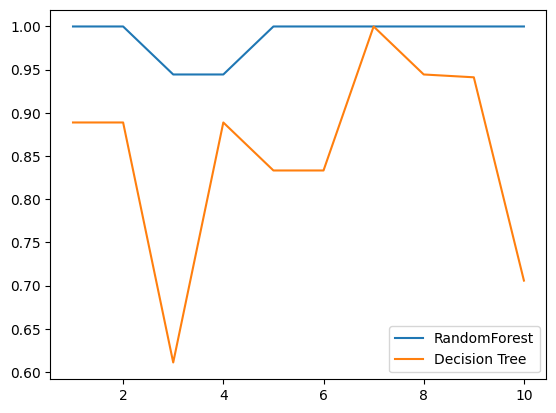

In [4]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
 
rfc = RandomForestClassifier(n_estimators=25)# 25顆樹
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
 
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()
 

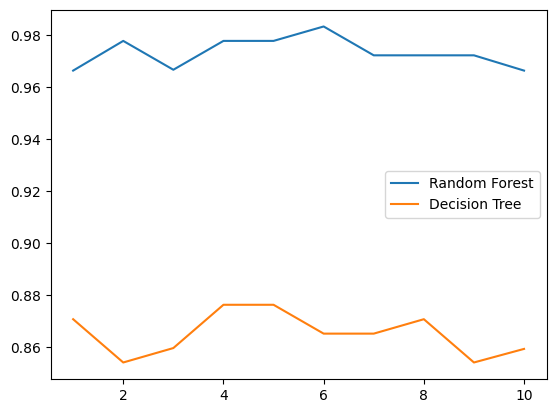

In [5]:
rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()
 

0.983625730994152 14


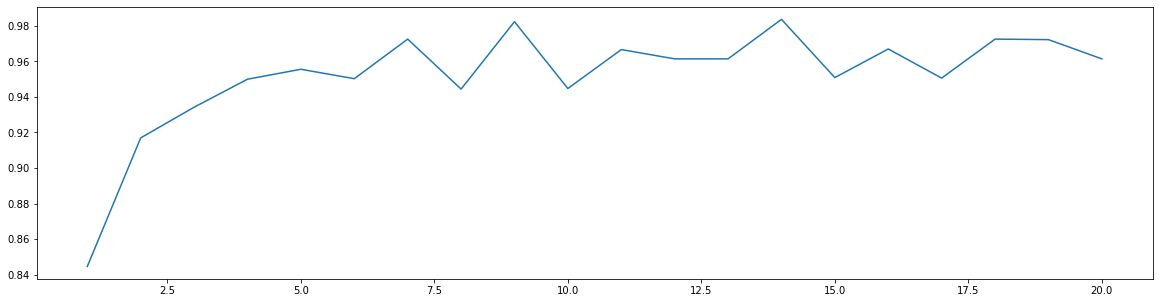

In [14]:
#####【TIME WARNING: 2mins 30 seconds】#####
 
superpa = []
for i in range(20):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
    
#輸出：最高精確度並取值; max(superpa))+1指的是森林樹木的數量 n_estimators   
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,21),superpa)
plt.show()

In [17]:
# n_estimators ->樹的數量
# random_state ->隨機挑選特徵進行分枝, 數字大較好
# 若=0時,確保分割出一樣的訓練與測試集
# 若!=0時,則會搭配隨機種子計算出一個值(使用numpy計算)
rfc = RandomForestClassifier(n_estimators=20,random_state=50)
rfc = rfc.fit(Xtrain, Ytrain)
 
# 隨機森林重要參數之一：estimators，檢視森林中樹的狀況
rfc.estimators_[0].random_state
 
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)


2124297904
554800608
979609483
319445101
1097252129
472180702
1702224004
92067910
1620556005
653697094
2132770070
1952947949
1753193605
1308601602
1167775839
1048960250
1118996551
1396711791
1331480004
1886800846


In [18]:
# 不使用測試集時,可改用"袋外資料" oob(out of bag data)

rfc = RandomForestClassifier(oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

rfc.oob_score_

C:\Users\ELSA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ELSA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ELSA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9269662921348315